In [1]:
import os
import numpy as np
from EnsemblePursuit.EnsemblePursuit import EnsemblePursuit
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, gaussian_filter1d
#from sklearn.decomposition import PCA

In [2]:
fname='/media/maria/DATA1/Documents/NeuroMatchAcademy2020_dat/kay_images.npz'
with np.load(fname) as dobj:
    dat = dict(**dobj)

In [3]:
ims=dat["stimuli"].reshape(1750,128*128)

In [4]:
import torch
def PCA(images,k=500):
    images=torch.FloatTensor(images)
    mean_im=torch.mean(images,dim=0)
    centered=torch.sub(images,mean_im)
    print(centered.size())
    U,S,V=torch.svd(centered)
    #print(U,S,V)
    S=torch.diag(S)
    print(U.size())
    reduced=torch.matmul(U[:,:k],S[:k,:k])
    #print(reduced.size())
    reduced=torch.matmul(reduced,V[:,:k].t())
    return np.array(reduced)

In [5]:
eigen_ims=PCA(ims)

torch.Size([1750, 16384])
torch.Size([1750, 1750])


In [6]:
print(eigen_ims.shape)

(1750, 16384)


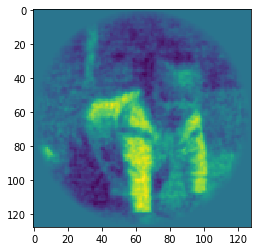

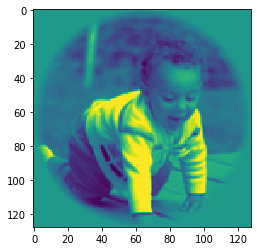

In [7]:
plt.imshow(eigen_ims[0,:].reshape(128,128))
plt.show()
plt.imshow(ims[0,:].reshape(128,128))

In [8]:
npix=16384
print(eigen_ims.shape)
print(dat['responses'].shape)
lam=0.1
B0 = np.linalg.solve((eigen_ims.T @ eigen_ims + lam * np.eye(npix)),  (eigen_ims.T @ dat['responses'])) # get the receptive fields for each neuron

#B0 = np.reshape(B0, (128, 128, dat['responses'].shape[1]))
#B0 = gaussian_filter(B0, [.5, .5, 0]) # smooth each receptive field a little

(1750, 16384)
(1750, 8428)


In [9]:
np.save('B0.npy',B0)

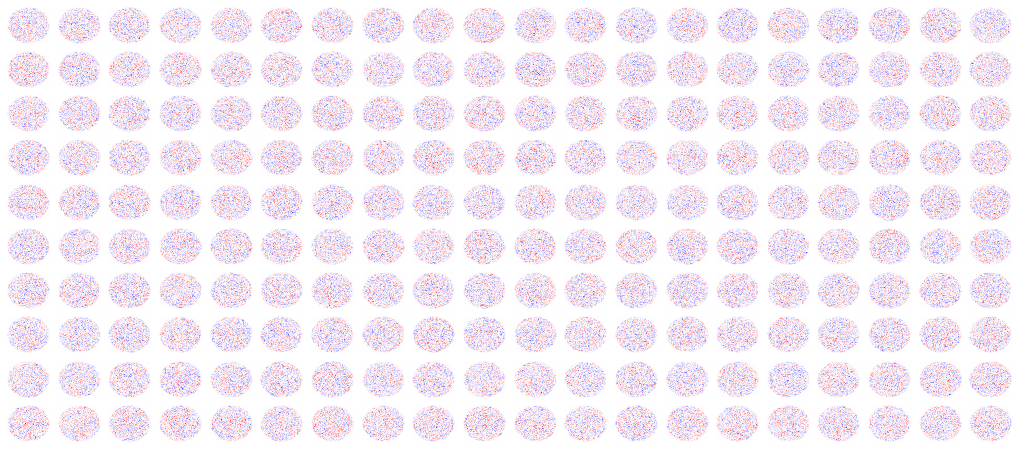

In [10]:

B0 = np.reshape(B0, (128, 128, dat['responses'].shape[1]))
B0 = gaussian_filter(B0, [.5, .5, 0]) # smooth each receptive field a little

plt.figure(figsize=(18, 8))
rfmax = np.max(B0)
for j in range(200):
    plt.subplot(10,20,j+1)
    rf = B0[:,:,j]
    # rfmax = np.max(np.abs(rf))
    plt.imshow(rf, aspect='auto', cmap = 'bwr', vmin = -rfmax, vmax = rfmax) # plot the receptive field for each neuron
    #plt.title('PC %d'%(1+j))
    plt.axis('off')

plt.show()

In [15]:
print(dat.keys())
print(dat['responses_test'].shape)

dict_keys(['stimuli', 'stimuli_test', 'responses', 'responses_test', 'roi', 'roi_names'])
(120, 8428)


In [17]:
mat=np.load('B0.npy')
from scipy.stats import zscore
Vpred = np.matmul(mat.reshape(-1,128*128), dat['stimuli_test'].reshape(120,128*128).T)
orig=zscore(dat['responses_test'],axis=1)
varexp = 1 - ((Vpred - orig.T)**2).sum(axis=1)/(orig.T**2).sum(axis=1)

(array([3.000e+00, 1.000e+00, 3.000e+00, 6.000e+00, 1.500e+01, 2.600e+01,
        6.900e+01, 1.640e+02, 5.560e+02, 7.585e+03]),
 array([-2.73252561e+02, -2.45911549e+02, -2.18570538e+02, -1.91229526e+02,
        -1.63888514e+02, -1.36547502e+02, -1.09206490e+02, -8.18654782e+01,
        -5.45244664e+01, -2.71834545e+01,  1.57557367e-01]),
 <a list of 10 Patch objects>)

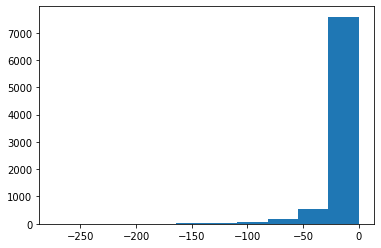

In [22]:
plt.hist(varexp)

In [20]:
print(varexp)

[ 1.06344118e-05  5.21585078e-06 -4.60353118e-06 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
